<a href="https://colab.research.google.com/github/OswaldoLopezAlcaraz/ti_1_practica2/blob/main/TI_1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Oswaldo López Alcaraz

**e-mail:** oswaldo.lopez5103@alumnos.udg.mx

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [39]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0



In [ ]:
# Preferably not to exceed 10 lines in a plot.
# First step to determine number of distributions to plot
x = random.randint(2,10)
my_random_alpha =[]

# Determination of miu, resolution and scale of x.
resolution = 500
miu = 3.0
aux_domain = np.linspace(miu - 5, miu + 5 , resolution)
# aux_domain = np.linspace(-7, 7 , resolution)

# Ramdon determination of alphas based on the number of distributions to plot
for i in range(x):
  randnum = round(random.uniform(0.01, 1.19),2)
  if randnum not in my_random_alpha:
    my_random_alpha.append(randnum)
print(f'{len(my_random_alpha)} distributions')


# Sorting of alphas in ascending order
my_random_alpha.sort()

#Creation of mother array that will store all the distributions
mother_levy_pdf = np.zeros((len(my_random_alpha), resolution))

# Actual creation of each distribution and their storing in mother array
for index,alpha in enumerate(my_random_alpha):
  # alpha controls the broad of the tails (wide of the bell)
  beta = 0  # This controls the symetry of the bell  (-1 <= 0 <= 1)
  # if alpha < 1 and beta = 1 then dominion (0, infinity)
  # if alpha < 1 and betha = -1 then dominion (-infinity, 0)

  # Creation of each distribution
  levy_pdf = np.array([levy_stable.pdf(i,alpha,beta,loc=miu) for i in aux_domain])

  # Storing of distributions in mother array
  for inner_index,value in enumerate(levy_pdf):
    mother_levy_pdf[index,inner_index ] = value


9 distributions


In [ ]:
# Plotting
fig_levy_pdf = go.Figure()

for indx,alpha_val in enumerate(my_random_alpha):
  fig_levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y = mother_levy_pdf[indx,:],
                                    marker= dict(size=2),
                                    line=dict(width=2),
                                    name= f'levy {alpha_val}',
                                    showlegend=True))

fig_levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

In [ ]:

# Determination of resolution and scale of x.
resolution = 100
aux_domain = np.linspace(miu -5, miu + 5, resolution)
alpha = 1.5
miu = 3
# alpha controls the broad of the tails (wide of the bell)
beta = 0  # This controls the symetry of the bell  (-1 <= 0 <= 1)
  # if alpha < 1 and beta = 1 then dominion (0, infinity)
  # if alpha < 1 and betha = -1 then dominion (-infinity, 0)

# Creation of each distribution
levy_pdf = np.array([levy_stable.pdf(i,alpha,beta,loc=miu) for i in aux_domain])



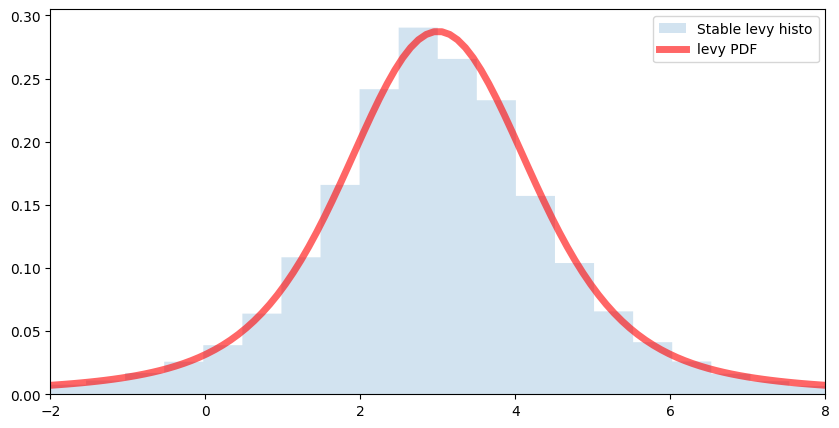

In [ ]:
# Plotting with matplotlib
# Creation of random numbers with levy distribution.
sample = 10000
r = levy_stable.rvs(alpha, beta, loc=miu,size=sample)
#r = levy.rvs(loc=miu, size=sample)


fig, ax = plt.subplots(1,1)

fig.set_figheight(5)
fig.set_figwidth(10)
ax.hist(r, bins=1000, density=True, histtype='stepfilled', alpha=0.2, label= 'Stable levy histo')
ax.set_xlim(aux_domain[0],aux_domain[-1])
ax.plot( aux_domain, levy_pdf ,'r-', lw=5, alpha=0.6, label='levy PDF')

ax.legend(loc='best')

plt.show()


## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

In [52]:
# Init variables
n_steps = 1000
s_pos = [0,0]
times = np.linspace(0,1,n_steps)
crw_exp = 0.3  #0.3
# Init variables for levy distribution
alpha = 1.1   #1.5
beta = 0      # 0
miu = 1       # 1

# Initialization of Brownian Walker Matrix with pandas
BM_2d_df = pd.DataFrame(columns=['x_pos','y_pos'])
tmp_df = pd.DataFrame([{'x_pos':s_pos[0], 'y_pos': s_pos[1]}])
BM_2d_df = pd.concat([BM_2d_df,tmp_df], ignore_index=True)

# Brownian walker in motion and assignation of directions
for i in range(n_steps-1):
  # Determination of speed using levy distribution
  sample = 1
  speed = levy_stable.rvs(alpha, beta, loc=miu,size=sample)
  velocity = Vec2d(speed,0)

  # Determination of angle using Cauchy distribution
  turn_angle = abs(wrapcauchy.rvs(crw_exp))
  velocity = velocity.rotated(turn_angle)
  x_velocity = velocity.x
  y_velocity = velocity.y

  # Motion of Brownian walker
  tmp_df = pd.DataFrame([{'x_pos':BM_2d_df.x_pos[i]+x_velocity[0],'y_pos':BM_2d_df.y_pos[i]+y_velocity[0]}])
  BM_2d_df = pd.concat([BM_2d_df,tmp_df], ignore_index=True)

  # 2D plotting
fig_BM_2d = go.Figure()

fig_BM_2d.add_trace(go.Scatter(x = BM_2d_df['x_pos'],
                                y = BM_2d_df['y_pos'],
                                marker = dict(size=2),
                                line = dict(width=1),
                                mode = 'lines',
                                name = 'Levy Flight 2D',
                                showlegend = True))

fig_BM_2d.show()

# 3D Plotting

fig_BM_2d = go.Figure(data=[go.Scatter3d(x = BM_2d_df['x_pos'],
                                y = BM_2d_df['y_pos'],
                                z = times,
                                mode = 'lines',
                                name = 'Levy Flight',
                                showlegend = True )])

fig_BM_2d.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*